In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import streamlit as st
from dataclasses import dataclass
from typing import Tuple, List

from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


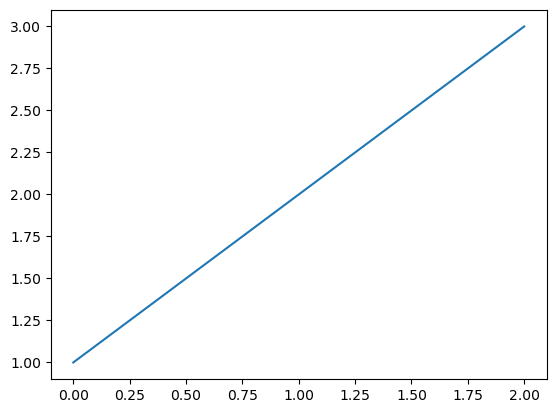

/var/folders/n0/zqhkt25d7sv8fn8m4k9ggcc80000gn/T/ipykernel_71349/3890092346.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


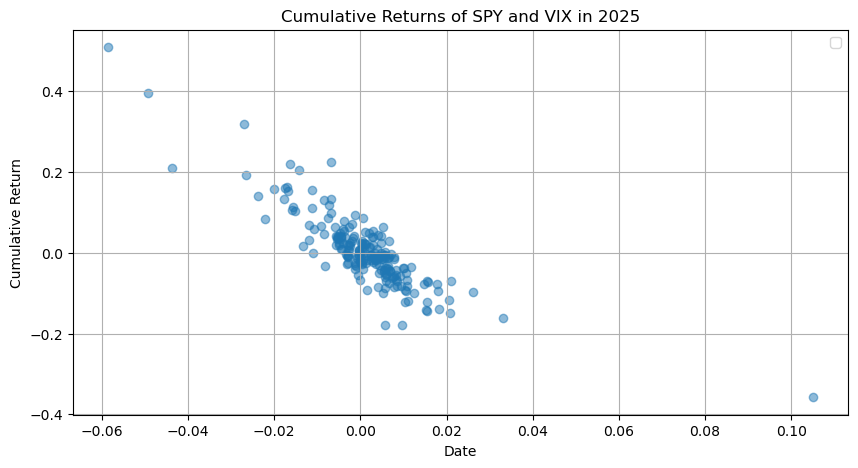

In [3]:
SPY = yf.download('SPY', start='2025-01-01', end='2025-12-31', interval='1d', auto_adjust=True)
VIX = yf.download('^VIX', start='2025-01-01', end='2025-12-31', interval='1d', auto_adjust=True)

X = SPY['Close'].pct_change().dropna().values.reshape(-1, 1)
Y = VIX['Close'].pct_change().dropna().values.reshape(-1, 1)
%matplotlib inline
fig, ax = plt.subplots()
ax.plot([1, 2, 3])
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, Y, alpha=0.5)
ax.set_title("Cumulative Returns of SPY and VIX in 2025")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return")
ax.legend()
ax.grid(True)
plt.show()